### Задача 1
Для заданного набора данных проведите корреляционный анализ.

В случае наличия пропусков в данных удалите строки или колонки,
содержащие пропуски.


Сделайте выводы о возможности построения моделей машинного обучения
и о возможном вкладе признаков в модель.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Admission_Predict.csv')
df.drop('Serial No.', axis=1, inplace=True)
print("Количество пропущенных значений в каждой колонке:")
print(df.isnull().sum())

Количество пропущенных значений в каждой колонке:
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


### вывод - пропусков не было

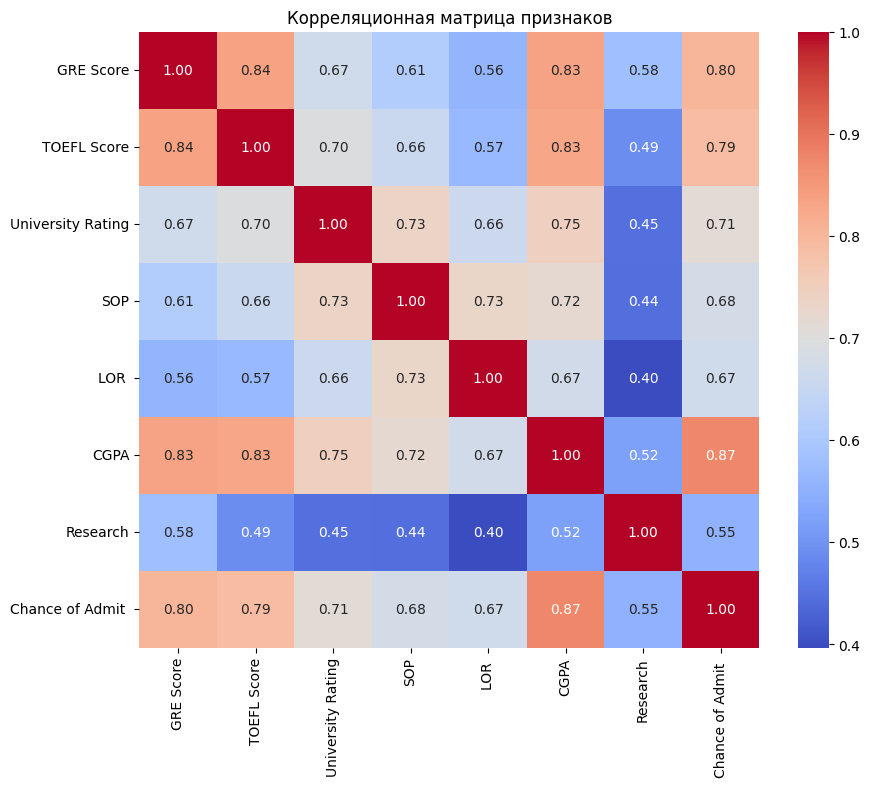

In [ ]:

# корреляция
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица признаков')
plt.show()


### Выводы о возможности построения моделей машинного обучения:

**На основе корреляционной матрицы можно сделать следующие выводы:**

- Целевая переменная 'Chance of Admit' имеет сильную положительную корреляцию с признаками 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR' и 'CGPA'. Это говорит о том, что увеличение значений этих признаков  приводит к увеличению вероятности поступления.
- Признак 'Research' также имеет положительную корреляцию с 'Chance of Admit', хотя и не такую сильную, как предыдущие.
- Между некоторыми входными признаками также наблюдается довольно высокая корреляция (например, между 'GRE Score' и 'TOEFL Score', между 'SOP' и 'LOR', а также между 'CGPA' и 'GRE Score'/ 'TOEFL Score'). Это называется мультиколлинеарность (корреляция между входными признаками), которую следует учитывать при построении некоторых моделей (например, линейной регрессии). Для моделей, основанных на деревьях решений (например, Random Forest, Gradient Boosting), мультиколлинеарность обычно не является серьезной проблемой, то есть она в целом не принципиальна и если она есть, то хуже не будет.

**Возможный вклад признаков в модель:**
- Наибольший вклад в модель, вероятно, внесут признаки с самой высокой корреляцией с 'Chance of Admit': 'CGPA', 'GRE Score', 'TOEFL Score', 'SOP' и 'LOR'.
- 'University Rating' 
- Признак 'Research' - наименьший вклад

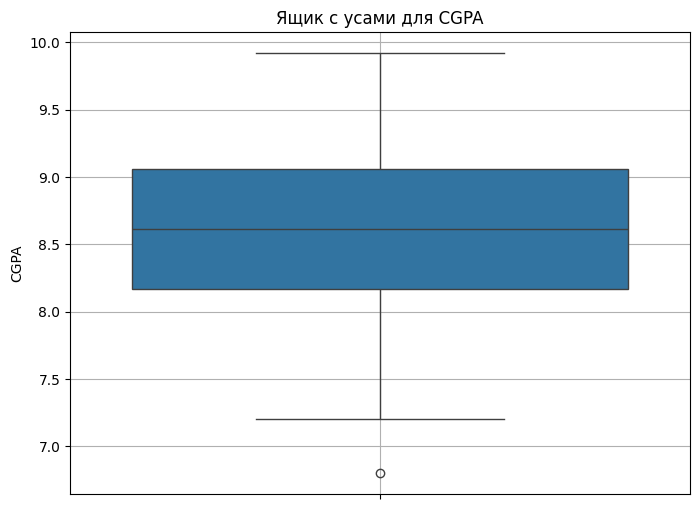

In [ ]:

# boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['CGPA'])
plt.title('Ящик с усами для CGPA')
plt.ylabel('CGPA')
plt.grid(True)
plt.show()